In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
or_df = pd.read_csv(r"E:\Machine Learning Project\credit_analysis\credit_risk_dataset.csv")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
or_df.duplicated().sum()

165

In [5]:
boolean_series = or_df.duplicated(keep = 'first')
or_df = or_df[~boolean_series]
or_df.reset_index(inplace = True, drop = True)

In [6]:
size = int(0.8 * len(or_df))

In [7]:
df = or_df[:size]

In [8]:
test_df = or_df[size:]

In [9]:
df['loan_status'].value_counts()

0    20135
1     5797
Name: loan_status, dtype: int64

In [10]:
test_df['loan_status'].value_counts()

0    5192
1    1292
Name: loan_status, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25932 entries, 0 to 25931
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  25932 non-null  int64  
 1   person_income               25932 non-null  int64  
 2   person_home_ownership       25932 non-null  object 
 3   person_emp_length           25193 non-null  float64
 4   loan_intent                 25932 non-null  object 
 5   loan_grade                  25932 non-null  object 
 6   loan_amnt                   25932 non-null  int64  
 7   loan_int_rate               23497 non-null  float64
 8   loan_status                 25932 non-null  int64  
 9   loan_percent_income         25932 non-null  float64
 10  cb_person_default_on_file   25932 non-null  object 
 11  cb_person_cred_hist_length  25932 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.4+ MB


In [12]:
df.shape

(25932, 12)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,25932.0,25.642604,3.736839,20.00,23.00,25.00,28.00,144.00
person_income,25932.0,60622.685948,37929.708564,4080.00,37256.25,54000.00,74000.00,1200000.00
person_emp_length,25193.0,4.482356,3.669123,0.00,2.00,4.00,7.00,123.00
loan_amnt,25932.0,9277.573076,6110.530554,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,23497.0,11.001356,3.225988,5.42,7.90,10.99,13.47,22.11
loan_status,25932.0,0.223546,0.416629,0.00,0.00,0.00,0.00,1.00
loan_percent_income,25932.0,0.173226,0.106875,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,25932.0,4.430703,2.408965,2.00,3.00,4.00,6.00,10.00


In [14]:
df.duplicated().sum()

0

In [15]:
boolean_series = df.duplicated(keep = 'first')
df = df[~boolean_series]
df.reset_index(inplace = True, drop = True)

In [16]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [17]:
len(df)

25932

In [18]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              739
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2435
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<Axes: xlabel='person_age'>

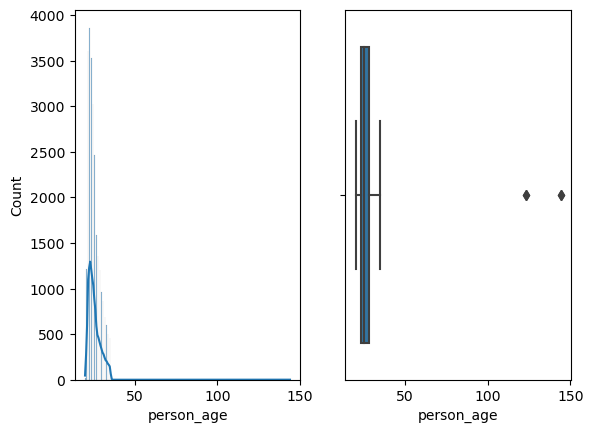

In [19]:
f, axes = plt.subplots(1, 2)

sns.histplot(df['person_age'], kde = True, ax=axes[0])
sns.boxplot(x = df['person_age'],ax=axes[1] )

In [20]:
def outlier_iqr(col, df):
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 -q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    print(upper_limit, lower_limit)
    df_copy = df.copy()
    df_copy[col] = np.where(df_copy[col] >= upper_limit, upper_limit, df_copy[col])
    df_copy[col] = np.where(df_copy[col] <= lower_limit, lower_limit, df_copy[col])

    
    
    return df_copy[col]

In [21]:
def remove_outlier(col, df):
    df_copy = df.copy()
    Q1 = np.percentile(df_copy[col], 25,
                   method = 'midpoint')
    Q3 = np.percentile(df_copy[col], 75,
                   method = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(df_copy[col] >= (Q3+1.5*IQR))
    lower = np.where(df_copy[col] <= (Q1-1.5*IQR))
    df_copy.drop(upper[0], axis = 0, inplace = True)
    df_copy.drop(lower[0], axis = 0, inplace = True)
    df_copy.reset_index(drop = True, inplace = True)
    return df_copy

In [22]:
df = remove_outlier('person_age', df)

<Axes: xlabel='person_age'>

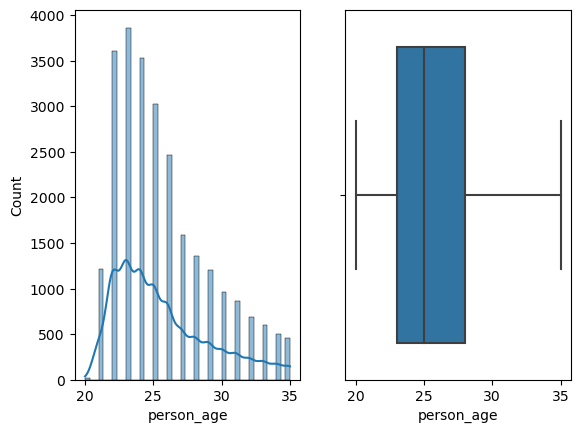

In [23]:
f, axes = plt.subplots(1, 2)

sns.histplot(df['person_age'], kde = True, ax=axes[0])
sns.boxplot(x = df['person_age'],ax=axes[1] )

<Axes: xlabel='person_income'>

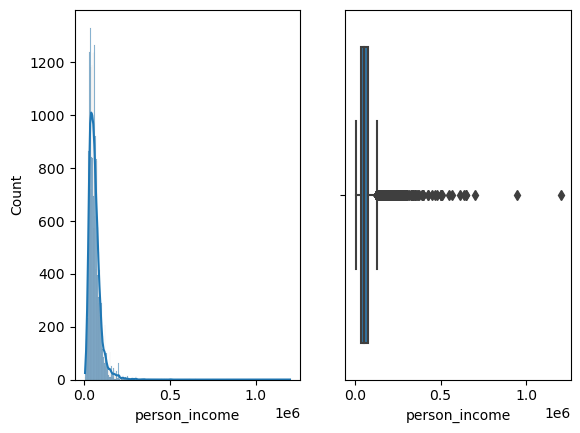

In [24]:
f, axes = plt.subplots(1, 2)

sns.histplot(df['person_income'], kde = True, ax=axes[0])
sns.boxplot(x = df['person_income'],ax=axes[1] )

<Axes: xlabel='person_income'>

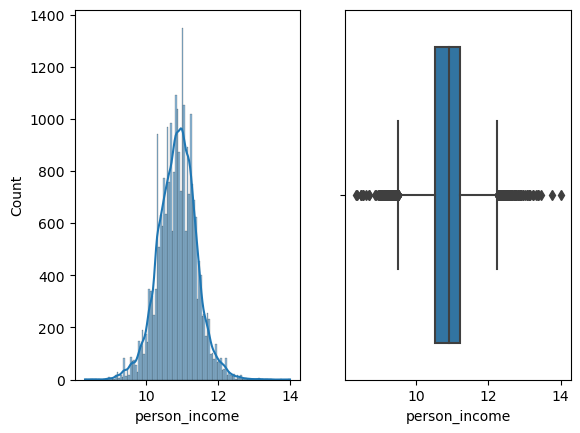

In [25]:
f, axes = plt.subplots(1, 2)

sns.histplot(np.log(df['person_income']), kde = True, ax=axes[0])
sns.boxplot(x = np.log(df['person_income']),ax=axes[1] )

In [26]:
df['person_income'] = np.log(df['person_income'])

<Axes: xlabel='person_emp_length'>

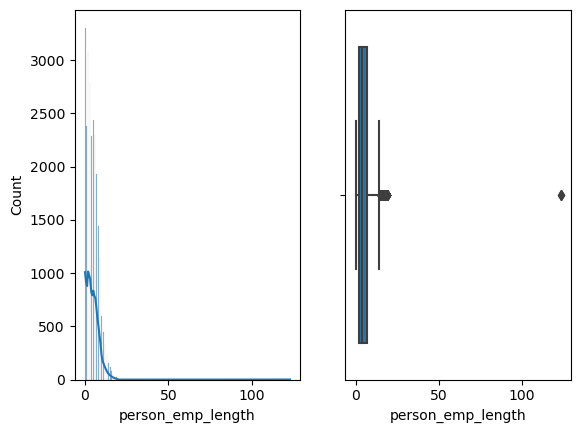

In [27]:
f, axes = plt.subplots(1, 2)

sns.histplot(df['person_emp_length'], kde = True, ax=axes[0])
sns.boxplot(x = df['person_emp_length'],ax=axes[1] )

In [28]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace = True)

In [29]:
df['person_emp_length'] = outlier_iqr('person_emp_length', df)

14.5 -5.5


<Axes: xlabel='person_emp_length'>

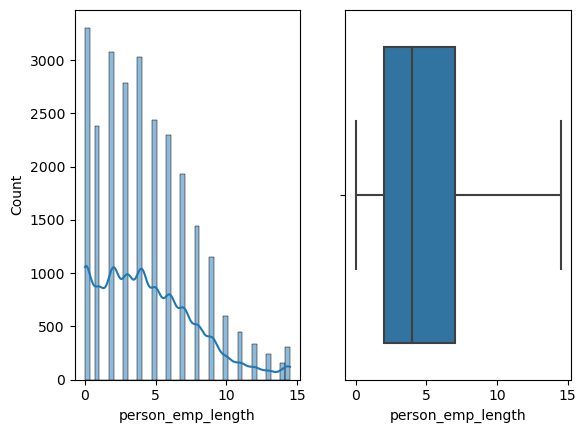

In [30]:
f, axes = plt.subplots(1, 2)

sns.histplot(df['person_emp_length'], kde = True, ax=axes[0])
sns.boxplot(x = df['person_emp_length'],ax=axes[1] )

<Axes: xlabel='loan_amnt'>

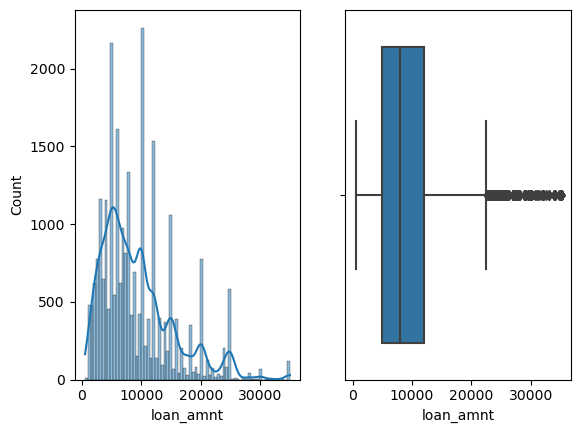

In [31]:
f, axes = plt.subplots(1, 2)

sns.histplot(df['loan_amnt'], kde = True, ax=axes[0])
sns.boxplot(x = df['loan_amnt'],ax=axes[1] )

In [32]:
np.sqrt(df['loan_amnt']).skew()

0.44792266555567556

<Axes: xlabel='loan_amnt'>

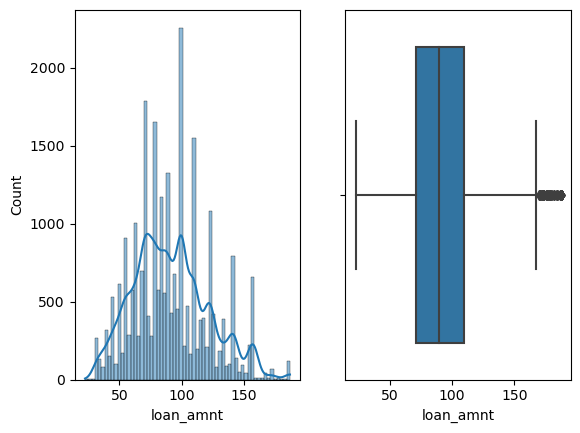

In [33]:
f, axes = plt.subplots(1, 2)

sns.histplot(np.sqrt(df['loan_amnt']), kde = True, ax=axes[0])
sns.boxplot(x = np.sqrt(df['loan_amnt']),ax=axes[1] )

In [34]:
df['loan_amnt'] = np.sqrt(df['loan_amnt'])

<Axes: xlabel='loan_int_rate'>

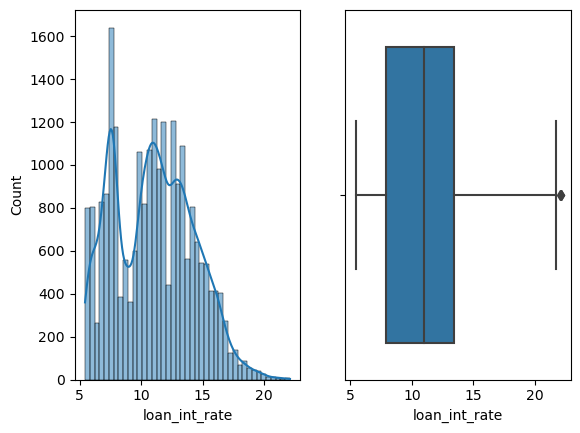

In [35]:
f, axes = plt.subplots(1, 2)

sns.histplot(df['loan_int_rate'], kde = True, ax=axes[0])
sns.boxplot(x = df['loan_int_rate'],ax=axes[1] )

In [36]:
df['loan_int_rate'].skew()

0.20021269497943167

In [37]:
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace = True)

In [38]:
df['loan_int_rate'] = outlier_iqr('loan_int_rate', df
       )

20.04 1.5600000000000014


<Axes: xlabel='loan_percent_income'>

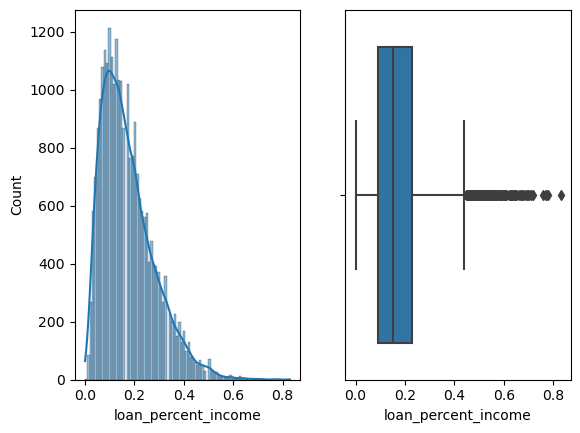

In [39]:
f, axes = plt.subplots(1, 2)

sns.histplot(df['loan_percent_income'], kde = True, ax=axes[0])
sns.boxplot(x = df['loan_percent_income'],ax=axes[1] )

In [40]:
df['loan_percent_income'].skew()

1.050122834435322

In [41]:
df['loan_percent_income'].fillna(df['loan_percent_income'].median(), inplace = True)

In [42]:
np.sqrt(df['loan_percent_income']).skew()

0.28547944394494124

<Axes: xlabel='loan_percent_income'>

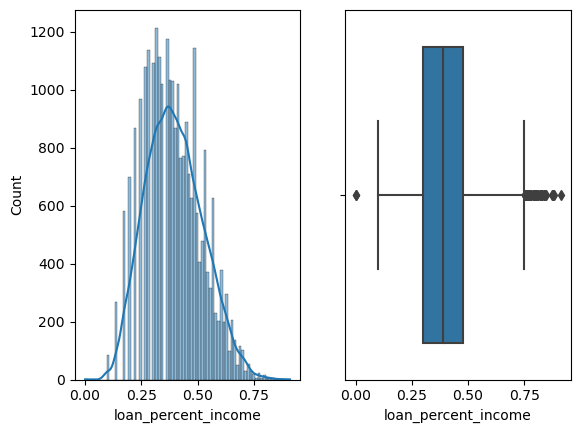

In [43]:
f, axes = plt.subplots(1, 2)

sns.histplot(np.sqrt(df['loan_percent_income']), kde = True, ax=axes[0])
sns.boxplot(x = np.sqrt(df['loan_percent_income']),ax=axes[1] )

In [44]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [45]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Axes: xlabel='cb_person_cred_hist_length'>

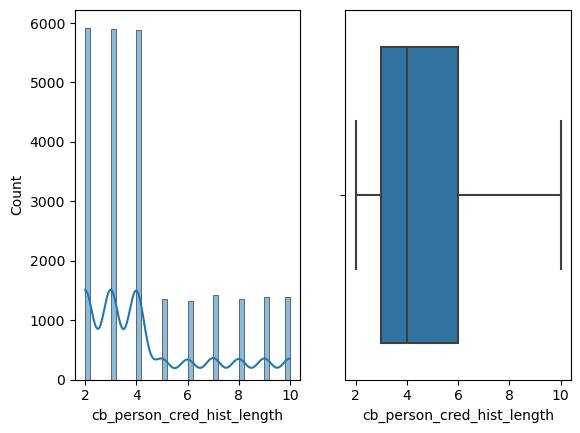

In [46]:
f, axes = plt.subplots(1, 2)

sns.histplot(df['cb_person_cred_hist_length'], kde = True, ax=axes[0])
sns.boxplot(x = df['cb_person_cred_hist_length'],ax=axes[1] )

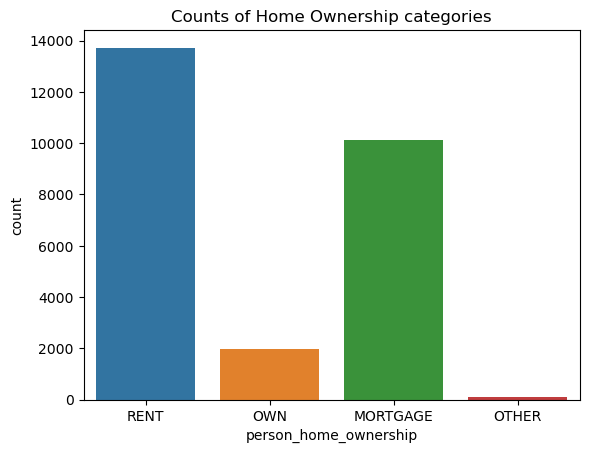

In [47]:
sns.countplot(data =df, x = 'person_home_ownership')
plt.title('Counts of Home Ownership categories');

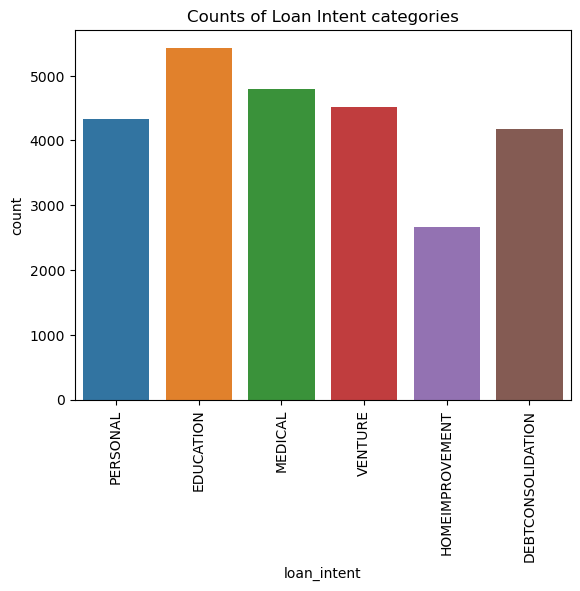

In [48]:
sns.countplot(data =df, x = 'loan_intent')
plt.xticks(rotation = 90)
plt.title('Counts of Loan Intent categories')
plt.show()

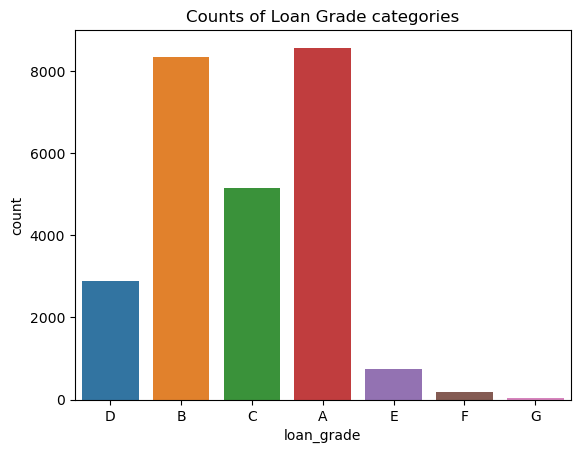

In [49]:
sns.countplot(data =df, x = 'loan_grade')
plt.title('Counts of Loan Grade categories')
plt.show()

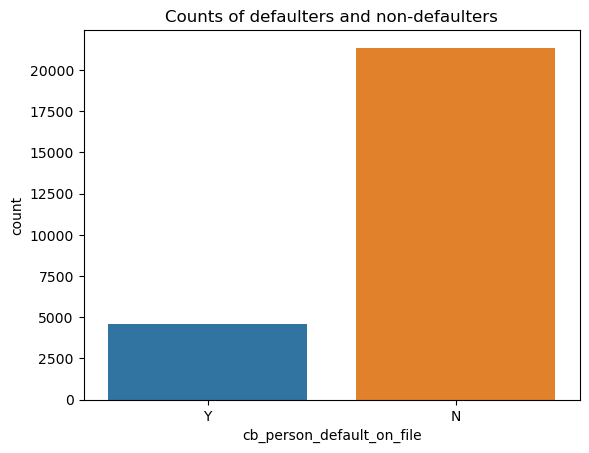

In [50]:
sns.countplot(data = df, x = 'cb_person_default_on_file')
plt.title('Counts of defaulters and non-defaulters')
plt.show()

<Axes: xlabel='person_age'>

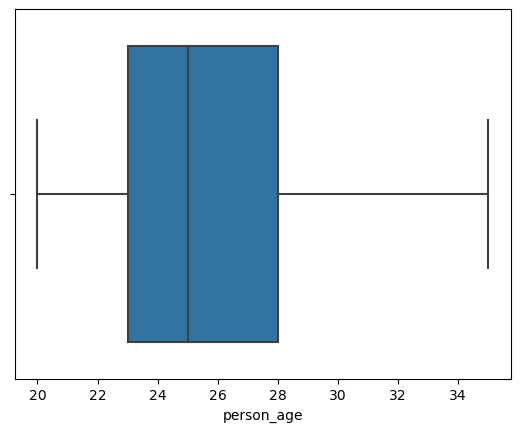

In [51]:
sns.boxplot(data = df, x = 'person_age')

<Axes: xlabel='person_income'>

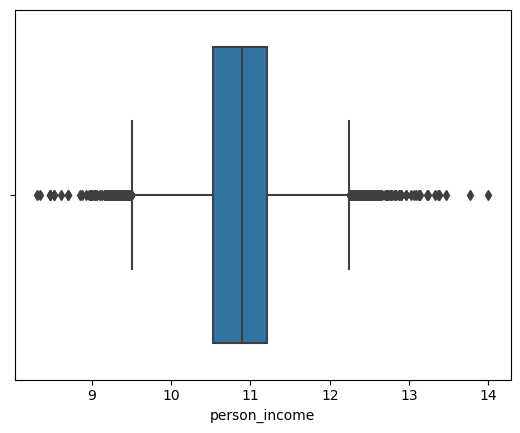

In [52]:
sns.boxplot(data = df, x = 'person_income')

<Axes: xlabel='person_emp_length'>

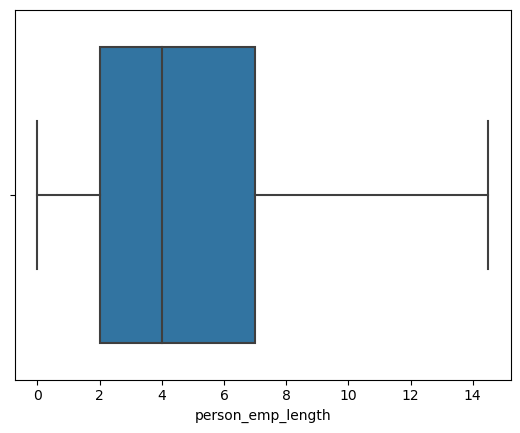

In [53]:
sns.boxplot(data = df, x = 'person_emp_length')

<Axes: xlabel='loan_amnt'>

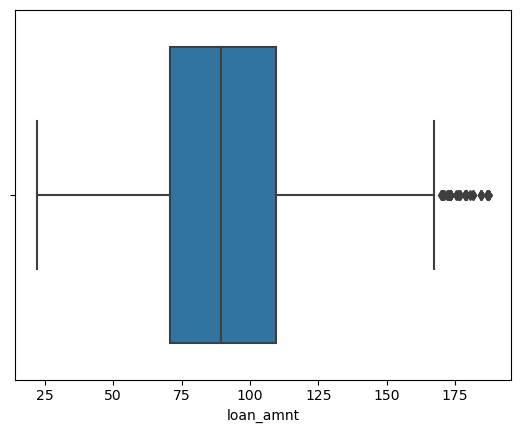

In [54]:
sns.boxplot(data = df, x = 'loan_amnt')

<Axes: xlabel='loan_int_rate'>

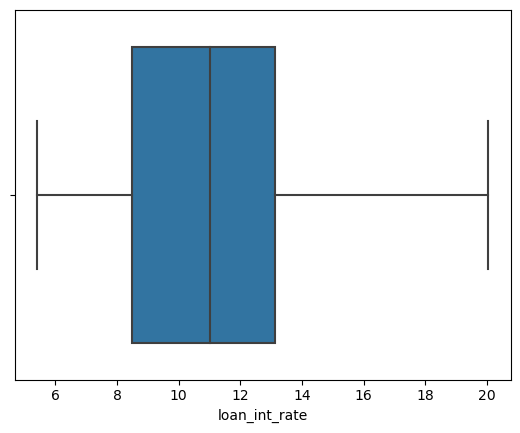

In [55]:
sns.boxplot(data = df, x = 'loan_int_rate')

<Axes: xlabel='loan_percent_income'>

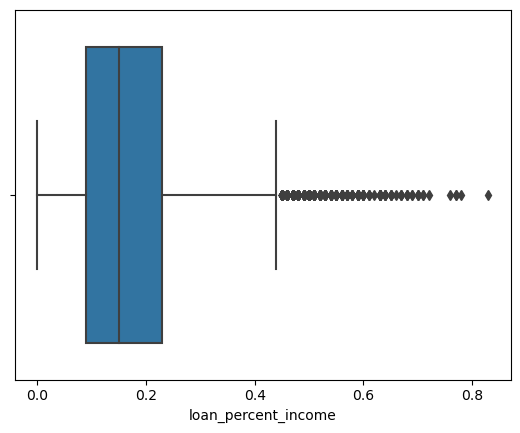

In [56]:
sns.boxplot(data = df, x = 'loan_percent_income')

<Axes: xlabel='cb_person_cred_hist_length'>

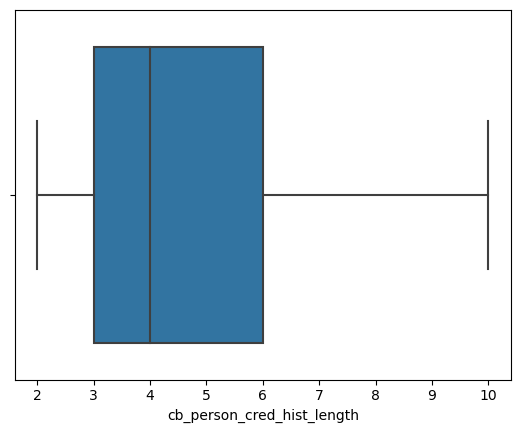

In [57]:
sns.boxplot(data = df, x = 'cb_person_cred_hist_length')

<Axes: xlabel='loan_status', ylabel='count'>

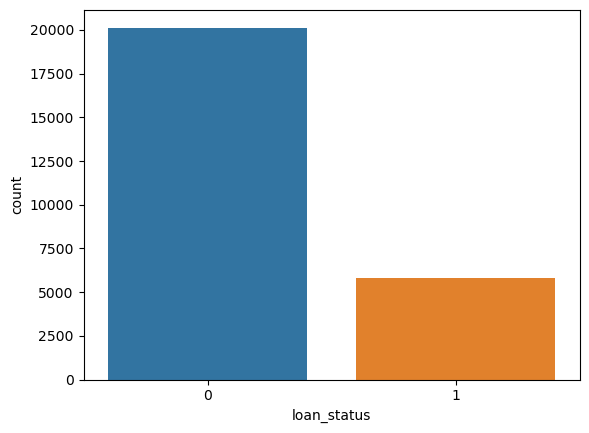

In [58]:
sns.countplot(data = df, x = 'loan_status')

In [59]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Axes: xlabel='person_home_ownership', ylabel='loan_amnt'>

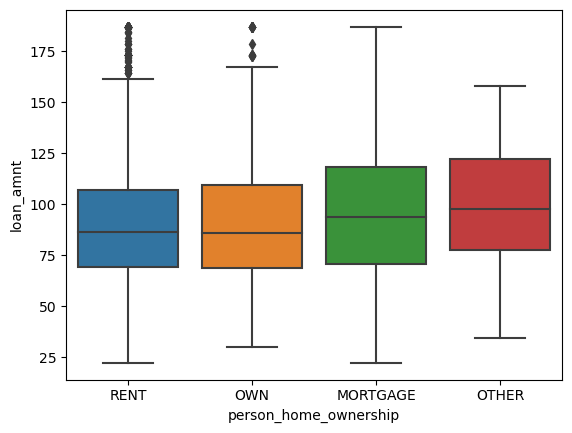

In [60]:
sns.boxplot(data = df, x = 'person_home_ownership', y = 'loan_amnt')

<Axes: xlabel='person_home_ownership', ylabel='loan_int_rate'>

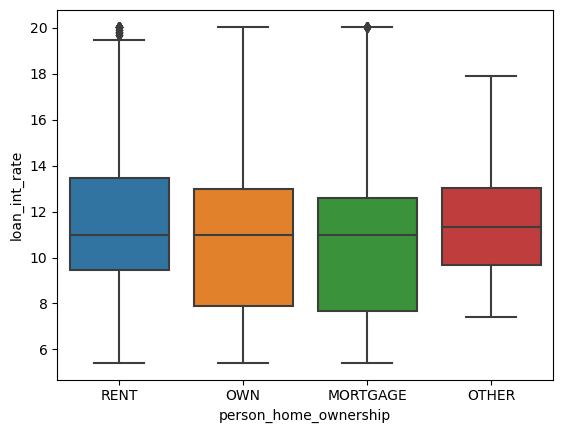

In [61]:
sns.boxplot(data = df, x = 'person_home_ownership', y = 'loan_int_rate')

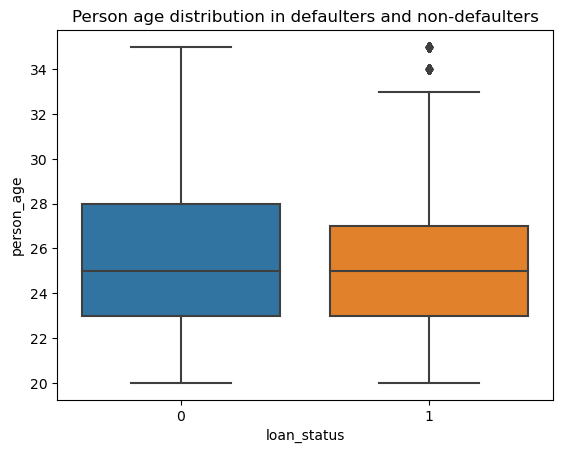

In [62]:
sns.boxplot(data = df, x = 'loan_status', y = 'person_age')
plt.title('Person age distribution in defaulters and non-defaulters')
plt.show()

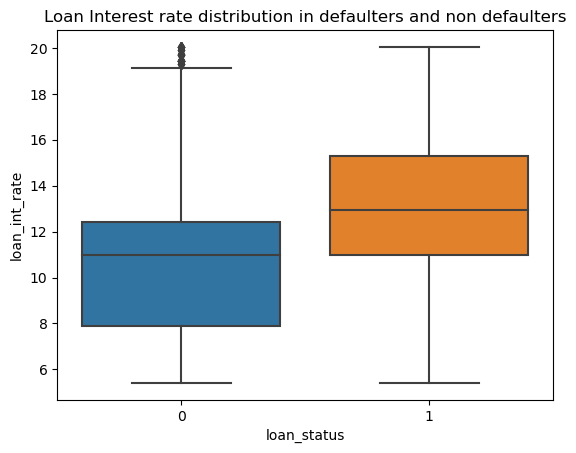

In [63]:
sns.boxplot(data = df, x = 'loan_status', y = 'loan_int_rate')
plt.title('Loan Interest rate distribution in defaulters and non defaulters')
plt.show()

In [64]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Axes: title={'center': 'Proportion of loan grade in defaulters vs non defaulters'}, xlabel='loan_status'>

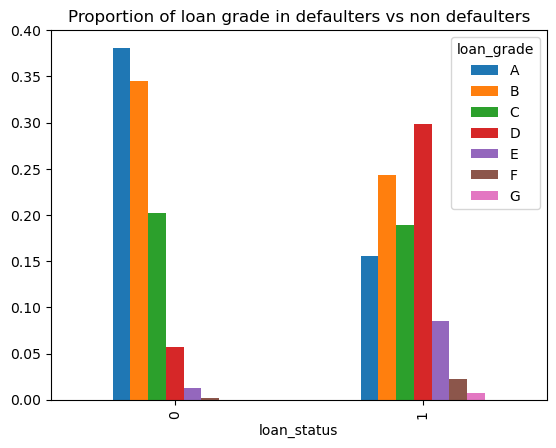

In [65]:
pd.crosstab(df['loan_status'], df['loan_grade'], normalize = 'index').plot(kind = 'bar', title = 'Proportion of loan grade in defaulters vs non defaulters')

<Axes: title={'center': 'Proportion of loan intent in defaulters vs non defaulters'}, xlabel='loan_status'>

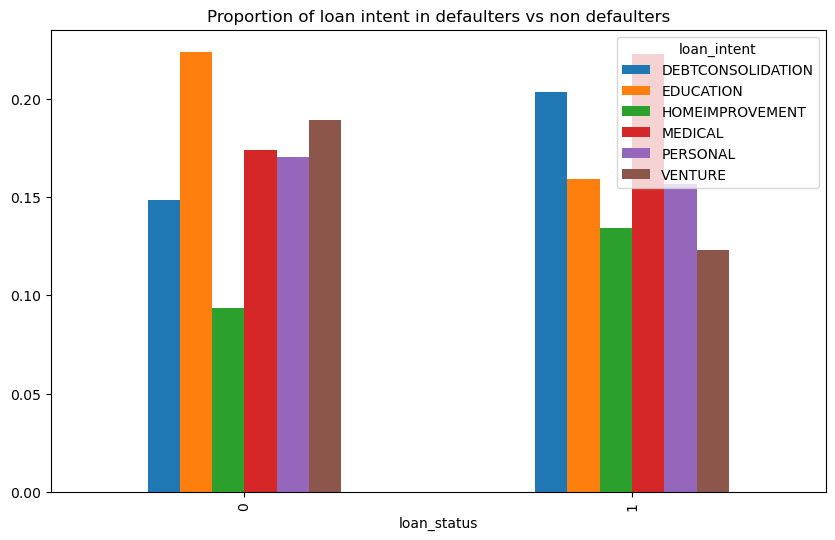

In [66]:
pd.crosstab(df['loan_status'], df['loan_intent'], normalize = 'index').plot(kind = 'bar', figsize = (10,6), title = ('Proportion of loan intent in defaulters vs non defaulters'))

<Axes: title={'center': 'Proportion of customers with default on their file'}, xlabel='loan_status'>

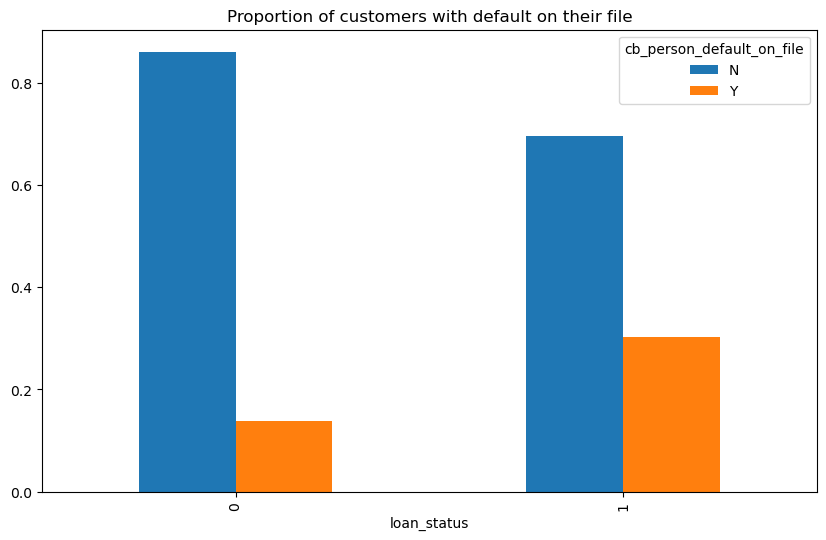

In [67]:
pd.crosstab(df['loan_status'], df['cb_person_default_on_file'], normalize = 'index').plot(kind = 'bar', figsize = (10,6), title = 'Proportion of customers with default on their file')

<Axes: title={'center': 'Proportion of loan grade for each loan intent'}, xlabel='loan_intent'>

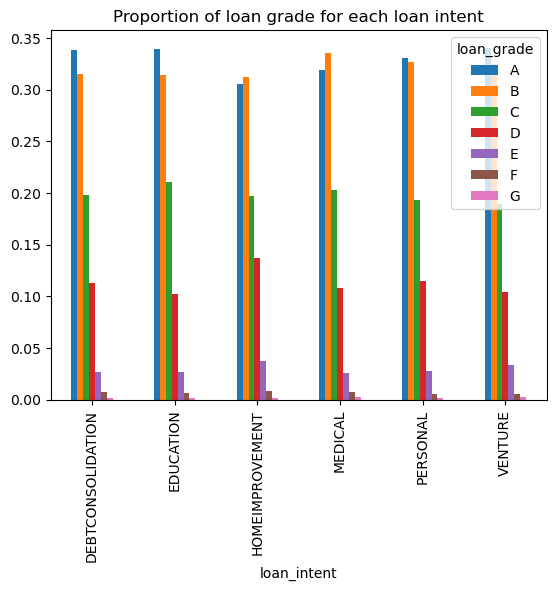

In [68]:
pd.crosstab(df['loan_intent'], df['loan_grade'], normalize = 'index').plot(kind = 'bar', title = 'Proportion of loan grade for each loan intent')

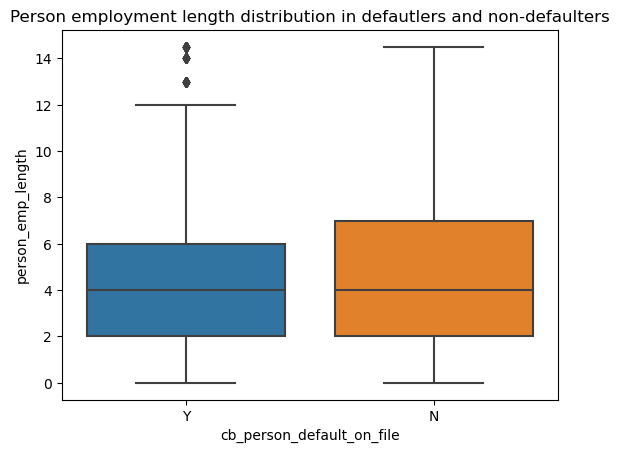

In [69]:
sns.boxplot(data = df, x = 'cb_person_default_on_file', y  = 'person_emp_length')
plt.title('Person employment length distribution in defautlers and non-defaulters')
plt.show()

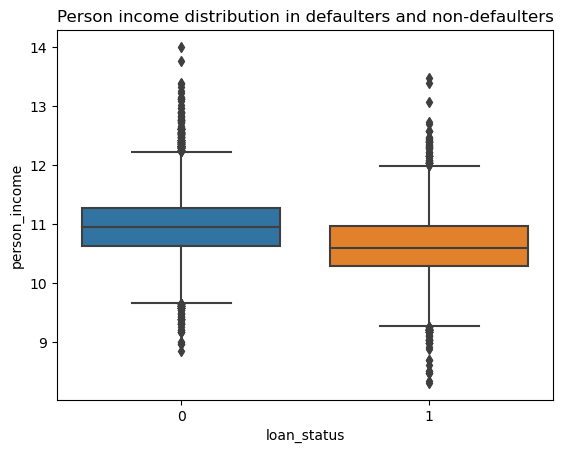

In [70]:
sns.boxplot(data = df, x = 'loan_status', y = 'person_income')
plt.title('Person income distribution in defaulters and non-defaulters')
plt.show()

In [71]:
df['loan_status'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [72]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

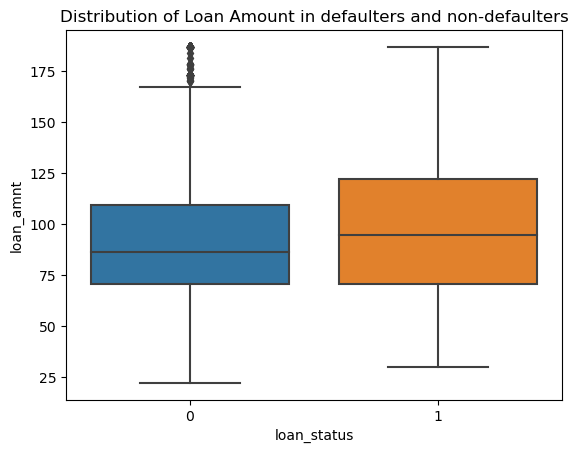

In [73]:
sns.boxplot(data = df, x = 'loan_status', y = 'loan_amnt')
plt.title('Distribution of Loan Amount in defaulters and non-defaulters')
plt.show()

<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

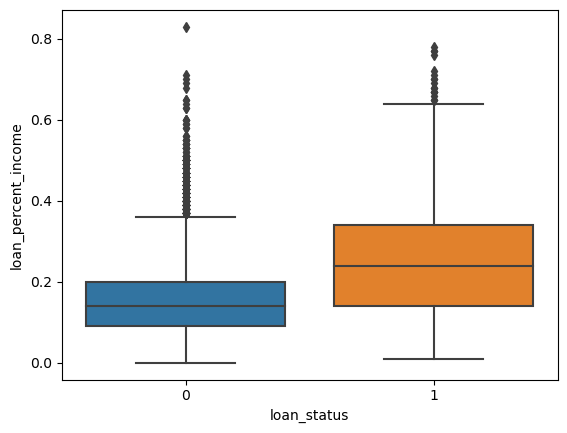

In [74]:
sns.boxplot(data = df, x = 'loan_status', y = 'loan_percent_income')

In [75]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

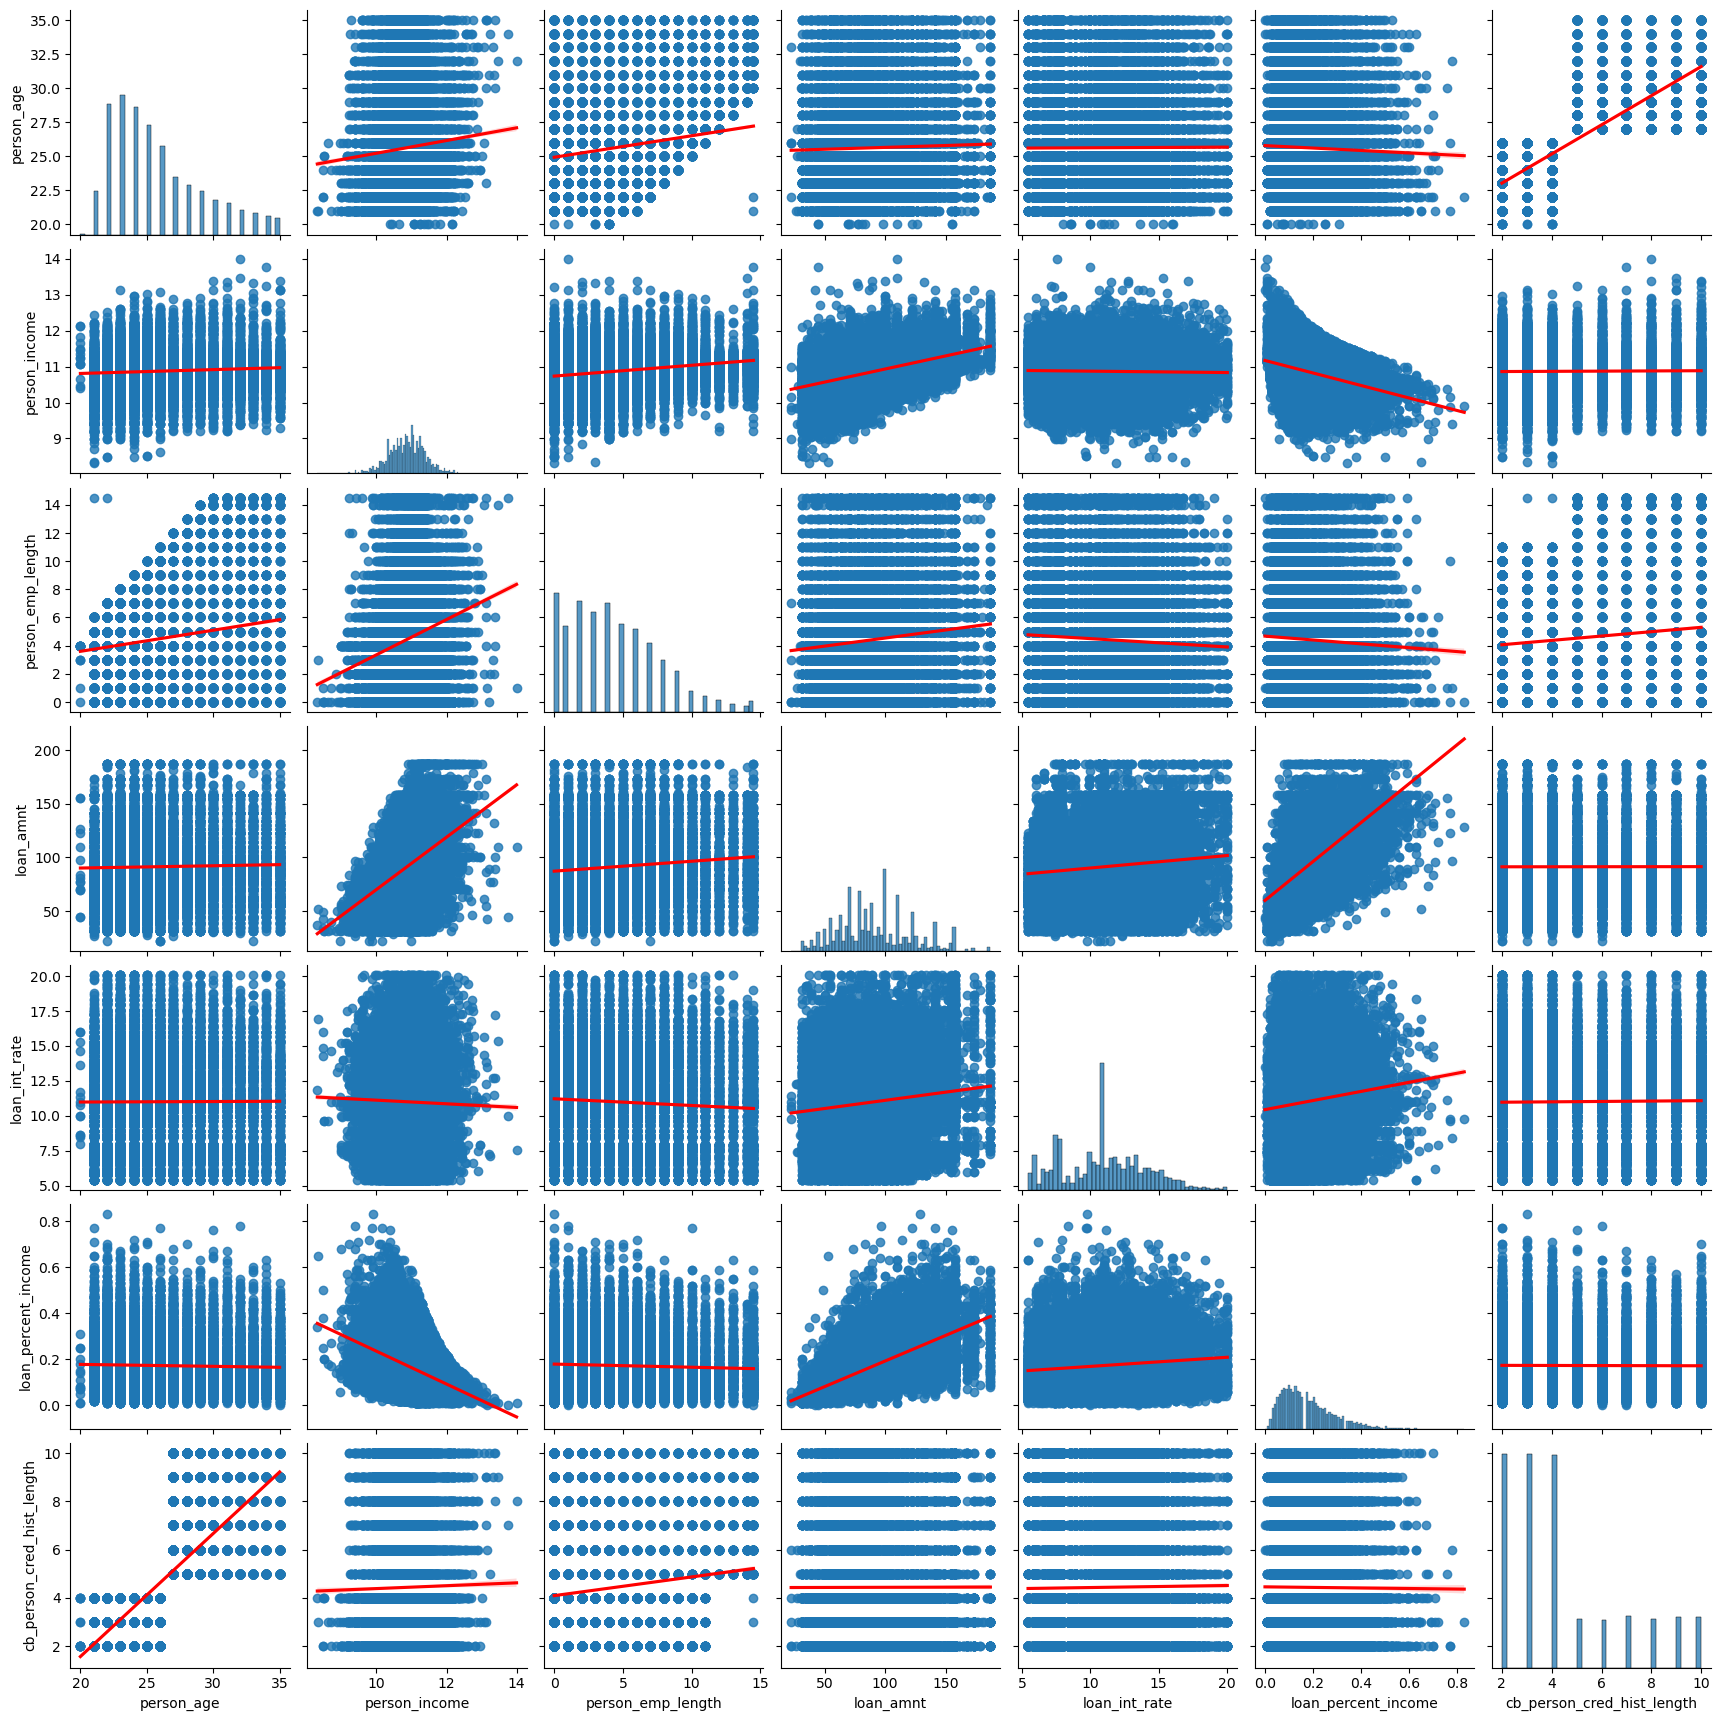

In [76]:
sns.pairplot(df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']], kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

<Axes: >

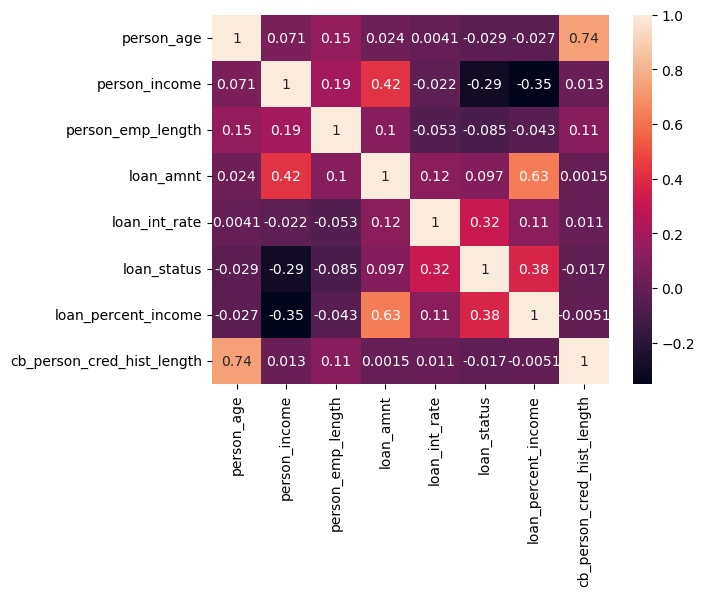

In [77]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [78]:
df_copy = df.copy()

In [79]:
dum_ho = pd.get_dummies(df_copy['person_home_ownership'])
df_copy = pd.concat([df_copy, dum_ho], axis = 1)
dum_li = pd.get_dummies(df_copy['loan_intent'])
df_copy = pd.concat([df_copy, dum_li], axis = 1)
dum_lg = pd.get_dummies(df_copy['loan_grade'])
df_copy = pd.concat([df_copy, dum_lg], axis = 1)

In [80]:
df_copy.drop(['person_home_ownership', 'loan_intent', 'loan_grade'], axis = 1, inplace = True)

In [81]:
df_copy.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'A', 'B', 'C', 'D',
       'E', 'F', 'G'],
      dtype='object')

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
df_copy

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,...,MEDICAL,PERSONAL,VENTURE,A,B,C,D,E,F,G
0,22,10.985293,14.5,187.082869,16.02,1,0.59,Y,3,0,...,0,1,0,0,0,0,1,0,0,0
1,21,9.169518,5.0,31.622777,11.14,0,0.10,N,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9.169518,1.0,74.161985,12.87,1,0.57,N,3,1,...,1,0,0,0,0,1,0,0,0,0
3,23,11.089805,4.0,187.082869,15.23,1,0.53,N,2,0,...,1,0,0,0,0,1,0,0,0,0
4,24,10.904119,8.0,187.082869,14.27,1,0.55,Y,4,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25923,28,11.461632,0.0,134.164079,7.88,0,0.19,N,10,1,...,0,0,0,1,0,0,0,0,0,0
25924,28,11.461632,0.0,67.082039,10.99,0,0.05,N,7,1,...,1,0,0,0,1,0,0,0,0,0
25925,32,11.082204,0.0,114.017543,12.53,0,0.20,N,6,0,...,0,0,0,0,0,1,0,0,0,0
25926,32,11.461632,14.5,94.868330,7.88,0,0.09,N,9,1,...,0,0,0,1,0,0,0,0,0,0


In [84]:
df_majority = df_copy[df_copy['loan_status'] == 0]
df_minority = df_copy[df_copy['loan_status'] == 1]

In [85]:
df_copy['loan_status'].value_counts()

0    20131
1     5797
Name: loan_status, dtype: int64

In [86]:
len(df_majority)

20131

In [87]:
from sklearn.utils import resample
#df_minority_upsampled = resample(df_minority, replace=True,    # sample with replacementn_samples= 21303, # to match majority classrandom_state=42)  # reproducible results

In [88]:
#len(df_minority_upsampled)

In [89]:
#df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [90]:
#df_upsampled.reset_index(inplace = True)

In [91]:
#df_upsampled['loan_status'].value_counts()

In [92]:
#df_upsampled.columns

In [93]:
#X = df_upsampled[['cb_person_cred_hist_length', 'person_income', 
#                  'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'MORTGAGE',
#       'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
#       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'A', 'B', 'C', 'D',
#       'E', 'F', 'G', 'historical_default' ]]
#y= df_upsampled['loan_status']

In [94]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [95]:
from sklearn.preprocessing import LabelEncoder
encode  = LabelEncoder()
df_copy['cb_person_default_on_file'] = encode.fit_transform(df_copy['cb_person_default_on_file'])

In [96]:
df_copy.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'A', 'B', 'C', 'D',
       'E', 'F', 'G'],
      dtype='object')

In [97]:
df_copy

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,...,MEDICAL,PERSONAL,VENTURE,A,B,C,D,E,F,G
0,22,10.985293,14.5,187.082869,16.02,1,0.59,1,3,0,...,0,1,0,0,0,0,1,0,0,0
1,21,9.169518,5.0,31.622777,11.14,0,0.10,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9.169518,1.0,74.161985,12.87,1,0.57,0,3,1,...,1,0,0,0,0,1,0,0,0,0
3,23,11.089805,4.0,187.082869,15.23,1,0.53,0,2,0,...,1,0,0,0,0,1,0,0,0,0
4,24,10.904119,8.0,187.082869,14.27,1,0.55,1,4,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25923,28,11.461632,0.0,134.164079,7.88,0,0.19,0,10,1,...,0,0,0,1,0,0,0,0,0,0
25924,28,11.461632,0.0,67.082039,10.99,0,0.05,0,7,1,...,1,0,0,0,1,0,0,0,0,0
25925,32,11.082204,0.0,114.017543,12.53,0,0.20,0,6,0,...,0,0,0,0,0,1,0,0,0,0
25926,32,11.461632,14.5,94.868330,7.88,0,0.09,0,9,1,...,0,0,0,1,0,0,0,0,0,0


In [98]:
boolean_series = df.duplicated(keep = 'first')
df = df[~boolean_series]
df.reset_index(inplace = True, drop = True)

In [99]:
test_df.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             148
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 660
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [100]:
test_df.duplicated().sum()

0

<Axes: xlabel='person_emp_length'>

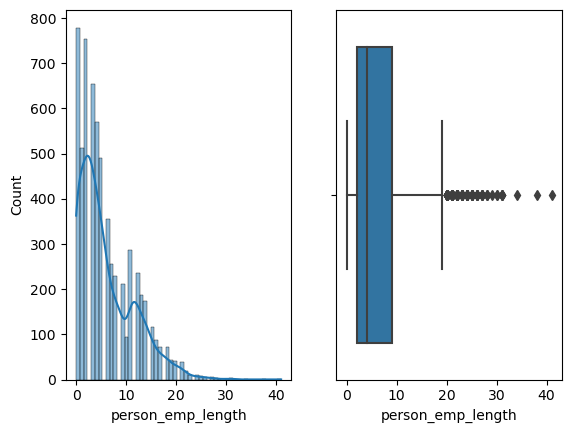

In [101]:
f, axes = plt.subplots(1, 2)

sns.histplot(test_df['person_emp_length'], kde = True, ax=axes[0])
sns.boxplot(x = test_df['person_emp_length'],ax=axes[1] )

In [102]:
test_df['person_emp_length'].fillna(test_df['person_emp_length'].median(), inplace = True)

In [103]:
test_df['person_emp_length'] = outlier_iqr('person_emp_length', test_df)

19.5 -8.5


<Axes: xlabel='person_emp_length'>

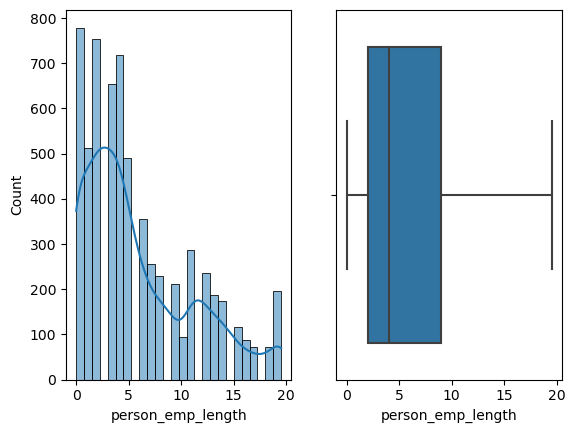

In [104]:
f, axes = plt.subplots(1, 2)

sns.histplot(test_df['person_emp_length'], kde = True, ax=axes[0])
sns.boxplot(x = test_df['person_emp_length'],ax=axes[1] )

In [105]:
test_df.reset_index(drop = True, inplace = True)

<Axes: xlabel='loan_int_rate'>

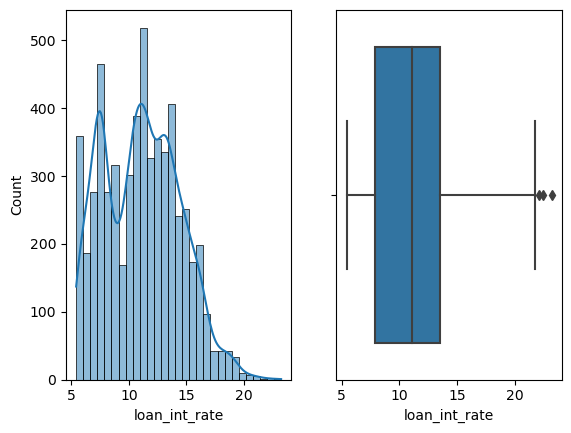

In [106]:
f, axes = plt.subplots(1, 2)

sns.histplot(test_df['loan_int_rate'], kde = True, ax=axes[0])
sns.boxplot(x = test_df['loan_int_rate'],ax=axes[1] )

In [107]:
test_df['loan_int_rate'].fillna(test_df['loan_int_rate'].median(), inplace = True)

In [108]:
test_df['loan_int_rate'] = outlier_iqr('loan_int_rate', test_df)

20.315 1.3949999999999996


<Axes: xlabel='person_income'>

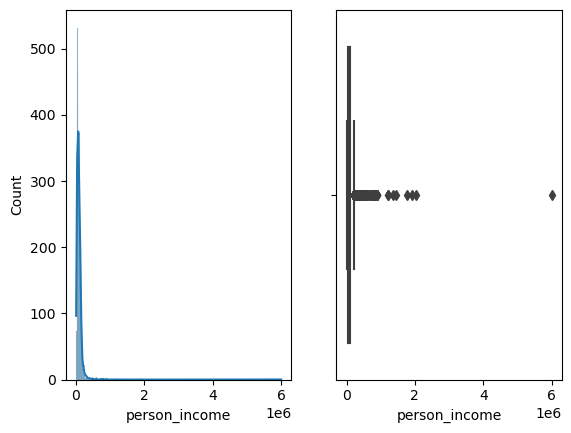

In [109]:
f, axes = plt.subplots(1, 2)

sns.histplot(test_df['person_income'], kde = True, ax=axes[0])
sns.boxplot(x = test_df['person_income'],ax=axes[1] )

In [110]:
test_df['person_income'] = np.log(test_df['person_income'])

<Axes: xlabel='person_income'>

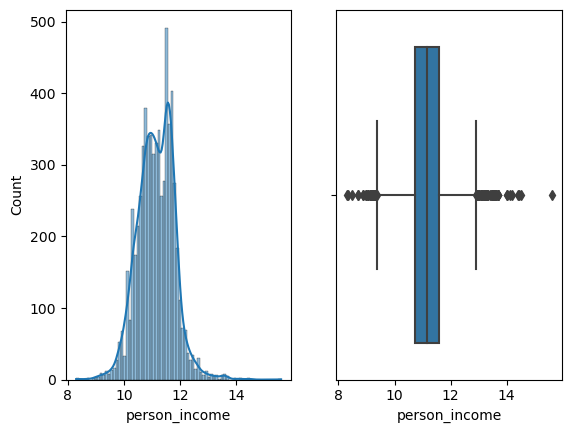

In [111]:
f, axes = plt.subplots(1, 2)

sns.histplot(test_df['person_income'], kde = True, ax=axes[0])
sns.boxplot(x = test_df['person_income'],ax=axes[1] )

In [112]:
test_df['loan_int_rate'].skew()

0.22231120402707857

In [113]:
test_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [114]:
from scipy import stats

In [115]:
dum_ho = pd.get_dummies(test_df['person_home_ownership'])
test_df = pd.concat([test_df, dum_ho], axis = 1)
dum_li = pd.get_dummies(test_df['loan_intent'])
test_df = pd.concat([test_df, dum_li], axis = 1)
dum_lg = pd.get_dummies(test_df['loan_grade'])
test_df = pd.concat([test_df, dum_lg], axis = 1)

In [116]:
df_copy

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,...,MEDICAL,PERSONAL,VENTURE,A,B,C,D,E,F,G
0,22,10.985293,14.5,187.082869,16.02,1,0.59,1,3,0,...,0,1,0,0,0,0,1,0,0,0
1,21,9.169518,5.0,31.622777,11.14,0,0.10,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9.169518,1.0,74.161985,12.87,1,0.57,0,3,1,...,1,0,0,0,0,1,0,0,0,0
3,23,11.089805,4.0,187.082869,15.23,1,0.53,0,2,0,...,1,0,0,0,0,1,0,0,0,0
4,24,10.904119,8.0,187.082869,14.27,1,0.55,1,4,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25923,28,11.461632,0.0,134.164079,7.88,0,0.19,0,10,1,...,0,0,0,1,0,0,0,0,0,0
25924,28,11.461632,0.0,67.082039,10.99,0,0.05,0,7,1,...,1,0,0,0,1,0,0,0,0,0
25925,32,11.082204,0.0,114.017543,12.53,0,0.20,0,6,0,...,0,0,0,0,0,1,0,0,0,0
25926,32,11.461632,14.5,94.868330,7.88,0,0.09,0,9,1,...,0,0,0,1,0,0,0,0,0,0


In [117]:
df_copy.duplicated().sum()

0

In [118]:
test_df.drop(['person_home_ownership', 'loan_intent', 'loan_grade'], axis = 1, inplace = True)

In [119]:
his_de = encode.fit_transform(test_df['cb_person_default_on_file'])

In [120]:
test_df['cb_person_default_on_file'] = his_de

In [121]:
df['loan_status'].value_counts()

0    20131
1     5797
Name: loan_status, dtype: int64

In [122]:
test_df['loan_status'].value_counts()

0    5192
1    1292
Name: loan_status, dtype: int64

In [123]:
from sklearn.utils import resample
df_majority = df_copy[df_copy.loan_status==0]
df_minority = df_copy[df_copy.loan_status==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=20257,    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled_train = pd.concat([df_majority, df_minority_upsampled])

 

In [124]:
df_copy['loan_status'].value_counts()

0    20131
1     5797
Name: loan_status, dtype: int64

In [125]:
test_df.loan_status.value_counts()

0    5192
1    1292
Name: loan_status, dtype: int64

In [126]:
test_df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'A', 'B', 'C', 'D',
       'E', 'F', 'G'],
      dtype='object')

In [127]:
df_upsampled_train.reset_index(drop = True, inplace = True)

In [128]:
df_upsampled_train.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'A', 'B', 'C', 'D',
       'E', 'F', 'G'],
      dtype='object')

In [129]:
np.array(df_upsampled_train[[ 'person_emp_length',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'A', 'B', 'C', 'D',
       'E', 'F', 'G']])

array([[ 5.        , 11.14      ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.        ,  7.9       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        , 10.65      ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , 11.00124244,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        ,  7.49      ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.        ,  9.32      ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [130]:
X_train = np.array(df_copy[['cb_person_cred_hist_length', 
                 'person_emp_length', 'loan_int_rate', 'loan_percent_income', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'A', 'B', 'C', 'D',
       'E', 'F', 'G' ]])
y_train = np.array(df_copy['loan_status'])

In [131]:
X_train.shape

(25928, 21)

In [132]:
y_train

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [133]:
or_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [134]:
test_df['loan_status'].value_counts()

0    5192
1    1292
Name: loan_status, dtype: int64

In [135]:
X_test = np.array(test_df[['cb_person_cred_hist_length', 
                 'person_emp_length', 'loan_int_rate', 'loan_percent_income', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'A', 'B', 'C', 'D',
       'E', 'F', 'G' ]])
y_test = np.array(test_df['loan_status'])

In [136]:
np.sum(y_test)

1292

In [137]:
X_test.shape

(6484, 21)

In [138]:
y_train

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [139]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [140]:
y_test.shape

(6484,)

In [141]:
X_test.shape

(6484, 21)

In [142]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = "gini")
clf = clf.fit(X_train, y_train)

In [143]:
pred_tree = clf.predict(X_test)

In [144]:
np.mean(pred_tree == y_test)

0.8405305367057372

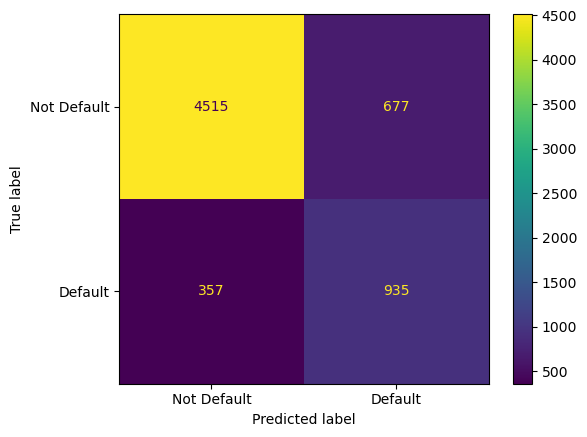

In [145]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, pred_tree)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['Not Default', 'Default'])

cm_display.plot()
plt.show()

In [146]:
from sklearn.tree import DecisionTreeClassifier
def train_using_gini(X_train, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini")
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
scale = StandardScaler()

In [149]:
np.sum(y_train)

5797

In [150]:
np.sum(y_test)

1292

In [151]:
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.fit_transform(X_test)

In [152]:
X_train_sc.shape

(25928, 21)

In [153]:
model = train_using_gini(X_train_sc, y_train)

In [154]:
np.mean(model.predict(X_test_sc)== y_test)

0.832048118445404

In [157]:
np.sum(y_test)

1292

In [158]:
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 8, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [159]:
pred_ent = train_using_entropy(X_train_sc, X_test_sc, y_train).predict(X_test_sc)

In [160]:
np.mean(pred_ent == y_test)

0.9168723010487353

In [161]:
pred_ent

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [162]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
!pip install xgboost


In [165]:
import xgboost 
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
pred_xg = model_xg.predict(X_test)


In [166]:
np.mean(pred_xg == y_test)

0.9247378161628624

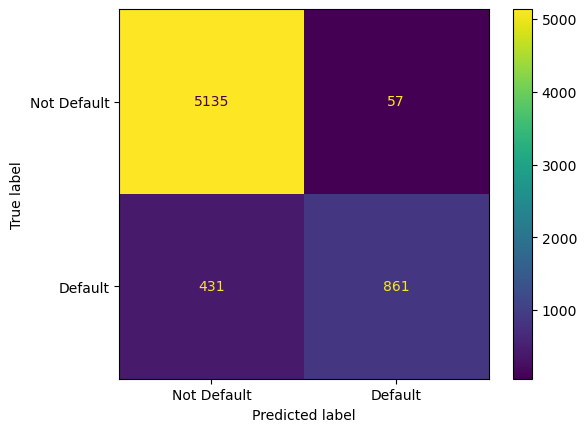

In [167]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, pred_xg)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['Not Default', 'Default'])

cm_display.plot()
plt.show()